Please follow the below steps to complete the project ( 30 points)

1.	Read the dataset and understand the features and target variable. 2 points
2.	Encode independent features. 2 points
3.	Separate the dependant variable from the rest of the train data 1 point
4.	Split the dataset into training and test data ( Take 80:20 ratio). 1 points
5.	Apply PCA on the independent features of train data. 1 point
6.	Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 3 points
7.	Transform the data using PCA ( select optimum number of PCs). 2 points
8.	Apply KMeans algorithm on the above transformed data. 3 points
9.	Select optimal number of clusters and form clusters out of the train data. 5 points
10.	Create a new column in the train data and populate it with the cluster labels. 2 points
11.	Transform the test data using the same PCA object that was fit on the train data. 2 points
12.	Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 2 points
13.	Apply SVC model on train dataset and predict target for test dataset. 3 points
14.	Check accuracy and confusion matrix. 1 point

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### 1.	Read the dataset and understand the features and target variable. 2 points


In [2]:
headers= ['IR','MR','FF','CR','CO','OP','Class']
bank_df = pd.read_csv('Qualitative_Bankruptcy.data.txt',names=headers)
bank_df.head()

,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

In [3]:
bank_df.columns #Get all the columsn list

Index(['IR', 'MR', 'FF', 'CR', 'CO', 'OP', 'Class'], dtype='object')

In [4]:
bank_df.dtypes

IR       object
MR       object
FF       object
CR       object
CO       object
OP       object
Class    object
dtype: object

In [5]:
bank_df.shape

(250, 7)

In [6]:
bank_df.describe()

,IR,MR,FF,CR,CO,OP,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [7]:
for col in bank_df:
    print(col)
    print(bank_df[col].unique())

IR
['P' 'N' 'A']
MR
['P' 'N' 'A']
FF
['A' 'P' 'N']
CR
['A' 'P' 'N']
CO
['A' 'P' 'N']
OP
['P' 'N' 'A']
Class
['NB' 'B']


In [8]:
bank_df.describe()

,IR,MR,FF,CR,CO,OP,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


### 2.	Encode independent features. 2 points

In [9]:
def func_labelEncoder(headers,features):
    encode= LabelEncoder()
    features[headers] = encode.fit_transform(features[headers].astype(str))
    
for i in headers:
    func_labelEncoder(i,bank_df)

In [10]:
bank_df.head()

,IR,MR,FF,CR,CO,OP,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [11]:
bank_df.describe()

,IR,MR,FF,CR,CO,OP,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [12]:
bank_df.corr()

,IR,MR,FF,CR,CO,OP,Class
IR,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
MR,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
FF,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
CR,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
CO,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
OP,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


In [13]:
bank_df.isnull().any()

IR       False
MR       False
FF       False
CR       False
CO       False
OP       False
Class    False
dtype: bool

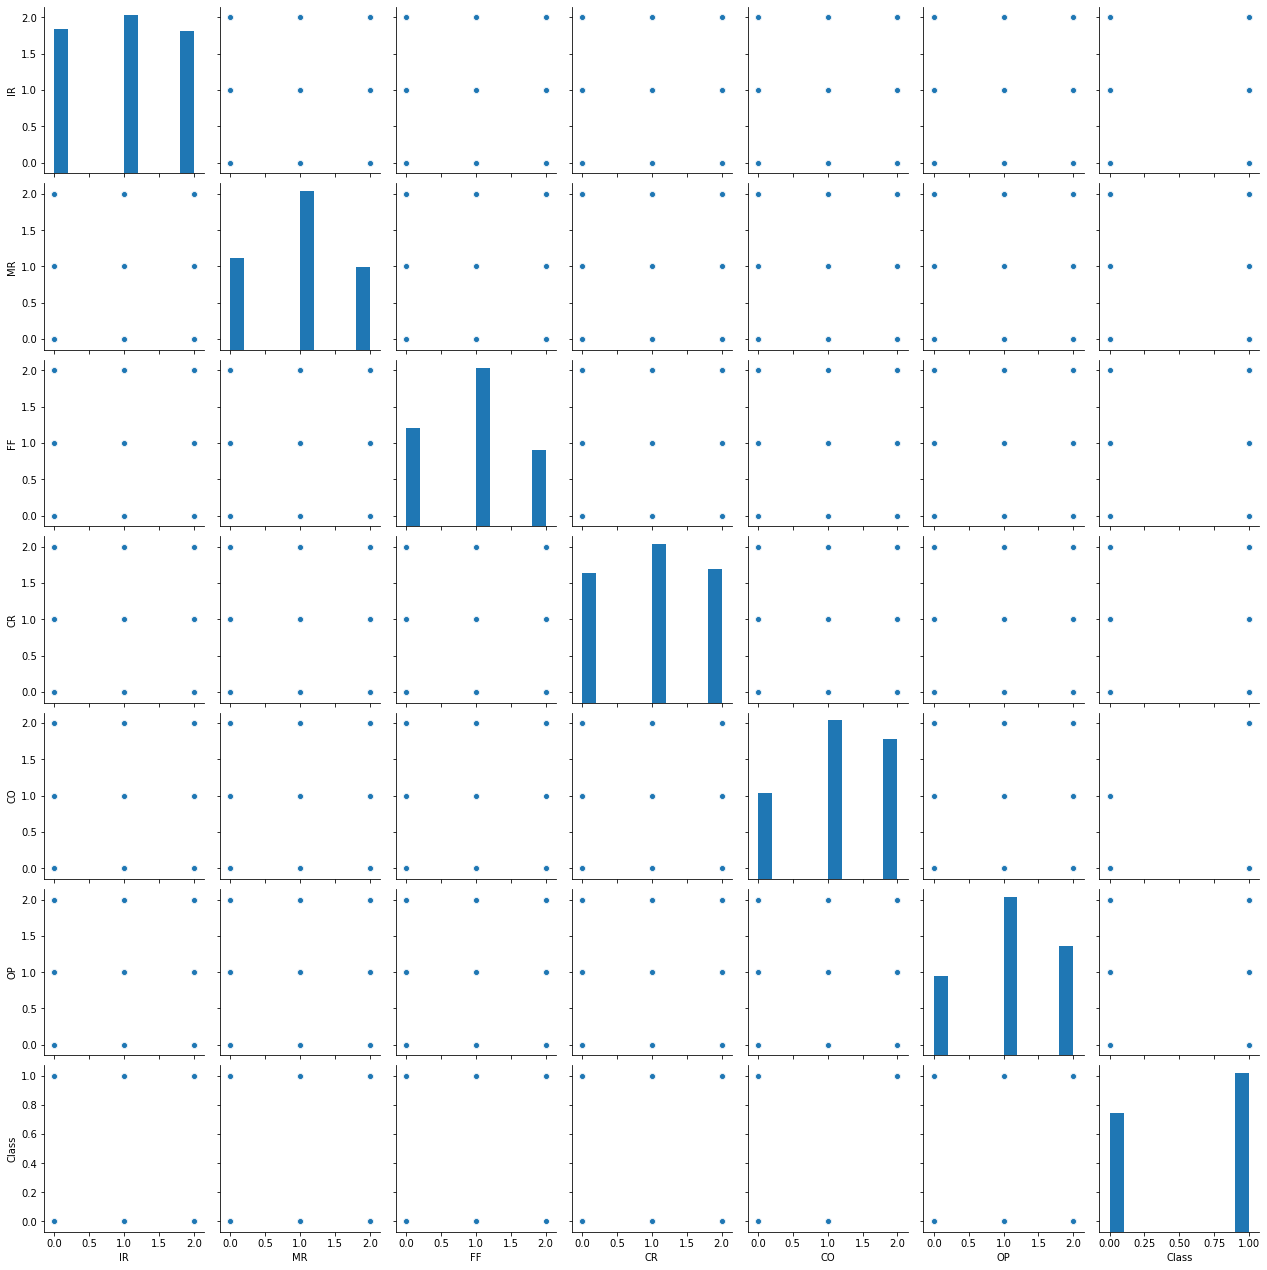

In [14]:
sns.pairplot(bank_df)

### 3.	Separate the dependant variable from the rest of the train data 1 point

In [15]:
xVal = bank_df.drop(['Class'], axis=1)

In [16]:
xVal.head()

,IR,MR,FF,CR,CO,OP
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [17]:
yVal = bank_df.Class.values.reshape(-1,1)

In [18]:
yVal.shape

(250, 1)

### 4.	Split the dataset into training and test data ( Take 80:20 ratio). 1 points

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(xVal,yVal, test_size=0.2, random_state=42)

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)

X_train shape: (200, 6)
X_test shape: (50, 6)
Y_train shape: (200, 1)
X_test shape: (50, 1)


### 5.	Apply PCA on the independent features of train data. 1 point

In [21]:
from sklearn.decomposition import PCA

### 6.	Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 3 points

### 7.	Transform the data using PCA ( select optimum number of PCs). 2 points

### 8.	Apply KMeans algorithm on the above transformed data. 3 points

In [22]:
### 9.	Select optimal number of clusters and form clusters out of the train data. 5 points

### 10.	Create a new column in the train data and populate it with the cluster labels. 2 points

### 11.	Transform the test data using the same PCA object that was fit on the train data. 2 points

### 12.	Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 2 points

### 13.	Apply SVC model on train dataset and predict target for test dataset. 3 points

### 14.	Check accuracy and confusion matrix. 1 point